In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

import cv2
import os

In [2]:
IMG_SAVE_PATH = 'images'
CLASS_MAP = {
    "rock": 0,
    "paper": 1,
    "scissor": 2,
    "none":3
}
NUM_CLASSES = len(CLASS_MAP)
def mapper(val):
    return CLASS_MAP[val]

In [3]:
# load images from the directory
dataset = []
for directory in os.listdir(IMG_SAVE_PATH):
    path = os.path.join(IMG_SAVE_PATH, directory)
    if not os.path.isdir(path):
        continue
    for item in os.listdir(path):
        # to make sure no hidden files get in our way
        if item.startswith("."):
            continue
        img = cv2.imread(os.path.join(path, item),0)
        img = cv2.resize(img, (50, 50))
        dataset.append([img, directory])

In [4]:
data, labels = zip(*dataset)
labels = list(map(mapper, labels))
data = np.array(data)
labels = np.array(labels)
print(data.shape)
data = data.reshape(2000,50,50,1)
print(data.shape)

(2000, 50, 50)
(2000, 50, 50, 1)


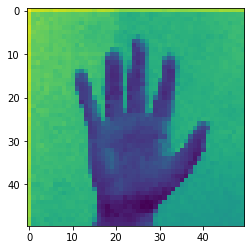

In [5]:
plt.imshow(data[500])

In [6]:
model = tf.keras.models.Sequential([
            # YOUR CODE STARTS HERE
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(50,50,1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(4, activation='softmax')
            # YOUR CODE ENDS HERE
    ])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(data, labels, epochs=5)
# save the model for later use
model.save("rock-paper-scissors-model.h5")

history.epoch, history.history['accuracy'][-1]

Epoch 1/5
63/63 [==============================] - 22s 354ms/step - loss: 2.0226 - accuracy: 0.6735
Epoch 2/5
63/63 [==============================] - 22s 352ms/step - loss: 0.1766 - accuracy: 0.9470
Epoch 3/5
63/63 [==============================] - 20s 319ms/step - loss: 0.0628 - accuracy: 0.9850s - loss: 0.0628 - accuracy: 0.98
Epoch 4/5
63/63 [==============================] - 21s 328ms/step - loss: 0.0222 - accuracy: 0.9955
Epoch 5/5
63/63 [==============================] - 20s 318ms/step - loss: 0.0194 - accuracy: 0.9940


([0, 1, 2, 3, 4], 0.9940000176429749)

In [7]:
MAP_CLASS = {
    0 : "rock",
    1: "paper",
    2: "scissor",
    3:"none"
}

In [8]:
# Capture Video
cap = cv2.VideoCapture(0)


while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
     # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    image = cv2.rectangle(gray, (5, 5) , (220, 220) , (255, 0, 0) , 2)  

    # Display the resulting frame
    cv2.imshow('frame',image)
    if cv2.waitKey(1) & 0xFF == ord('a'):
        start = True
        image_model = image[5:220,5:220]
        image_model = cv2.resize(image_model, (50, 50))
        image_model = image_model.reshape(1,50,50,1)
        pred = model.predict(image_model)
        findd = np.array(pred[0])
        result = np.where(findd == max(findd))
        print("Result: ", MAP_CLASS[result[0][0]])
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

[[6.5363740e-05 7.4915108e-05 3.8880442e-04 9.9947089e-01]] Max:  0.9994709
Result:  none
[[6.845355e-05 7.708494e-05 3.995359e-04 9.994549e-01]] Max:  0.9994549
Result:  none
[[6.4223517e-05 7.5845965e-05 3.9299956e-04 9.9946696e-01]] Max:  0.99946696
Result:  none
[[6.1495855e-05 9.9990952e-01 2.8536713e-05 5.0760724e-07]] Max:  0.9999095
Result:  paper
[[2.3498745e-03 9.3862758e-04 9.9604625e-01 6.6531595e-04]] Max:  0.99604625
Result:  scissor
[[0.5069102  0.00074532 0.49124253 0.0011019 ]] Max:  0.5069102
Result:  rock
[[8.6186165e-01 6.1100244e-04 1.3713728e-01 3.9006496e-04]] Max:  0.86186165
Result:  rock
[[9.9888259e-01 1.0309252e-03 8.2239130e-05 4.1170847e-06]] Max:  0.9988826
Result:  rock
[[9.9819607e-01 7.7104528e-04 9.9053420e-04 4.2415275e-05]] Max:  0.99819607
Result:  rock
[[2.3696966e-04 9.9693537e-01 2.5307252e-03 2.9685741e-04]] Max:  0.99693537
Result:  paper
[[4.4634429e-04 9.9835086e-01 1.1456916e-03 5.7087018e-05]] Max:  0.99835086
Result:  paper
[[5.5134231e-0